In [6]:
# Importing essential libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading data
df = pd.read_csv('data.csv')
df.drop('car_ID',axis=1,inplace=True)
# Split in feature and target for future purpose
features = df.drop('price',axis=1)
target = df.price

# Names of numerical and categorical features
numerical_features = [col for col in features.columns if features[col].dtypes!='O']
categorical_features = [col for col in df.columns if col not in numerical_features]

In [3]:
print(f'Numerical Features \n {numerical_features}, \nCategorical Features \n {categorical_features}')

Numerical Features 
 ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg'], 
Categorical Features 
 ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'price']


In [4]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [33]:
df.isnull().sum()  # We don't have any missing values

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

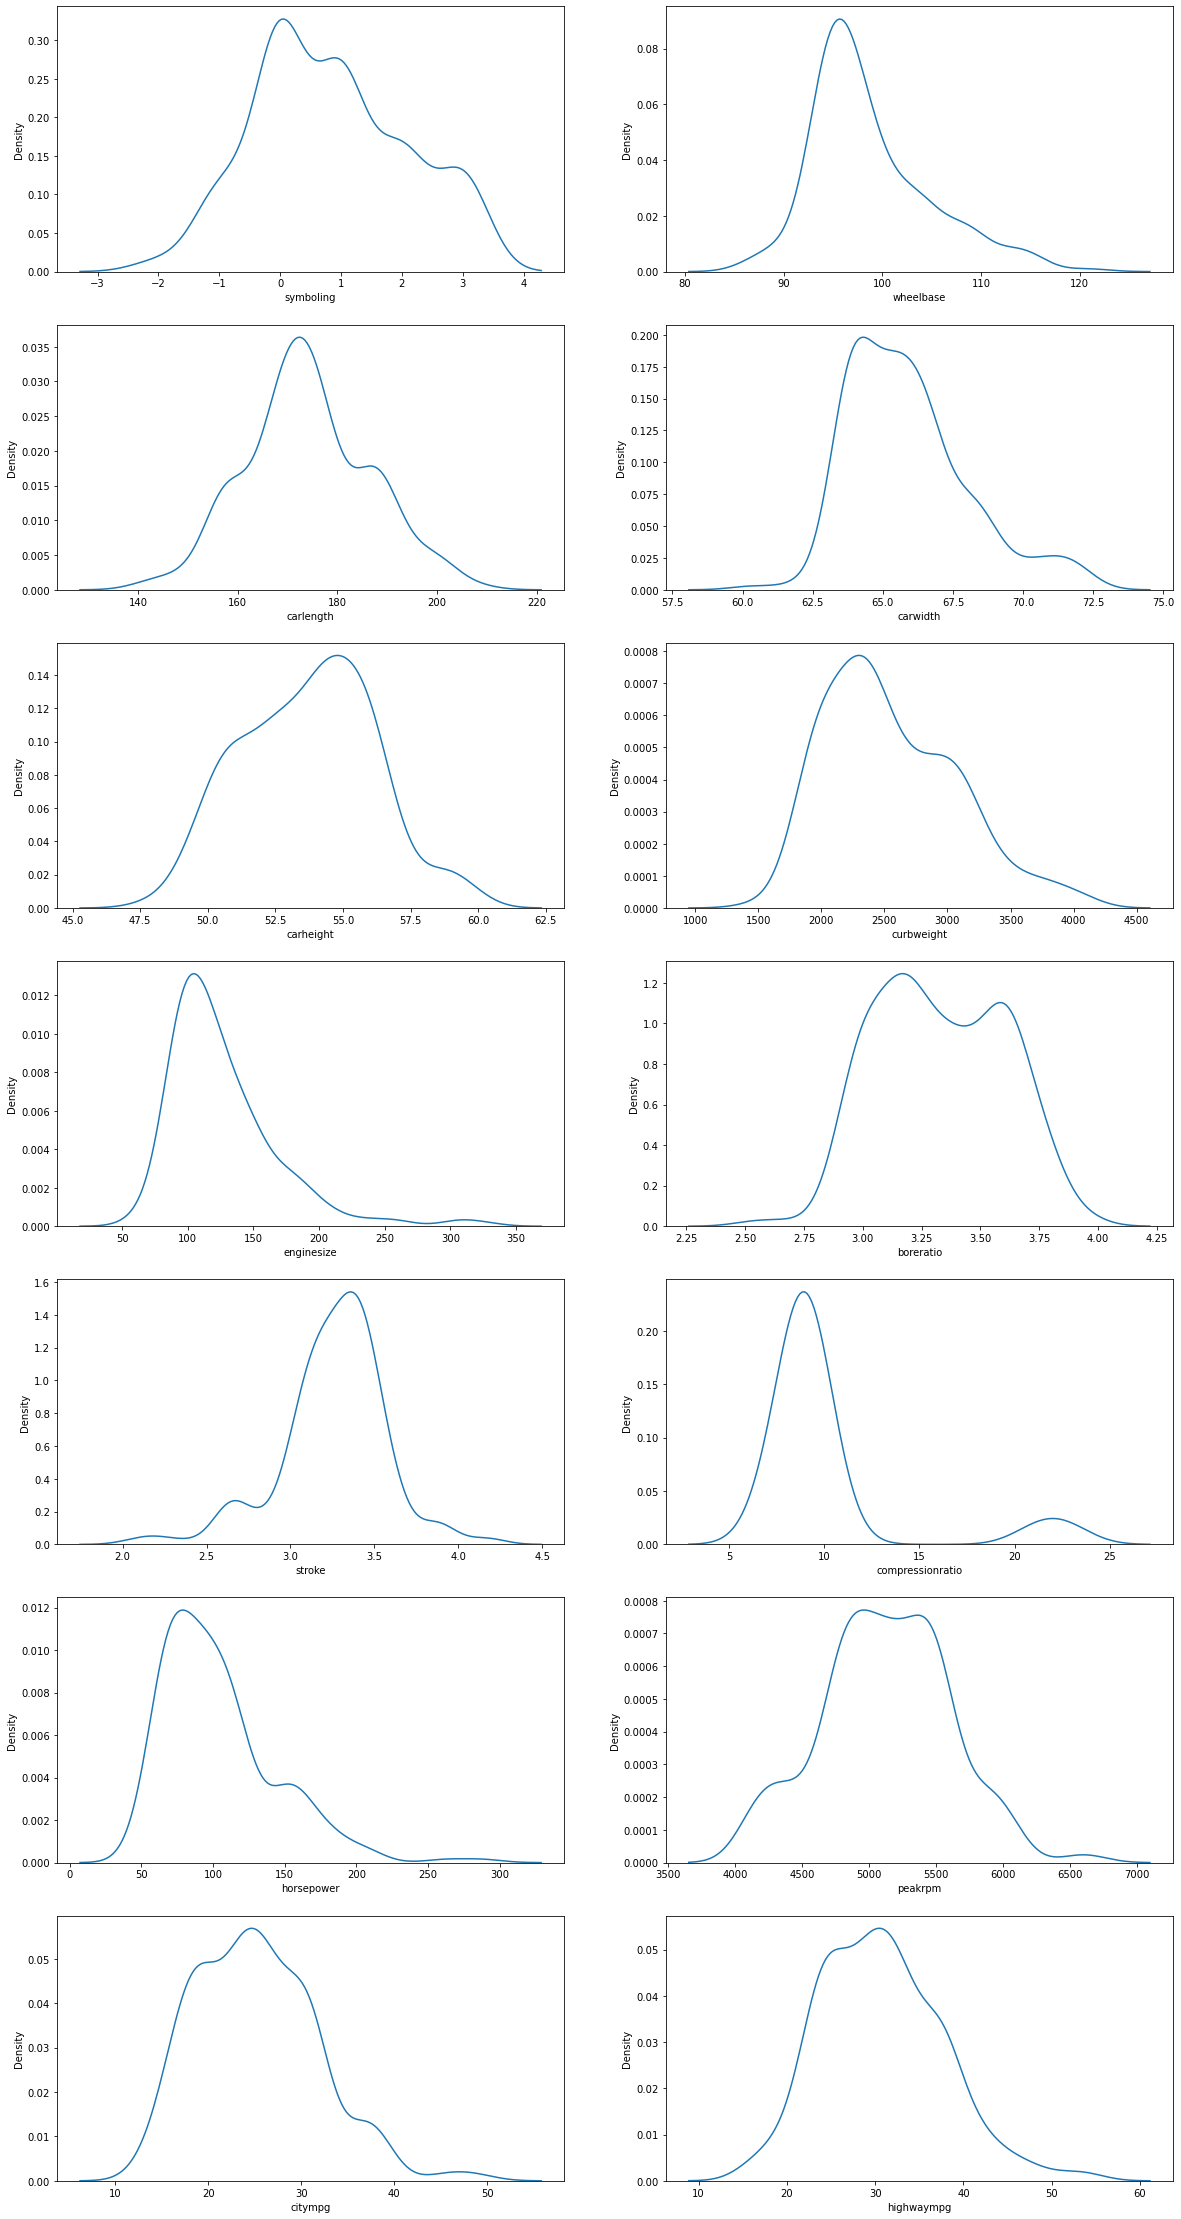

In [13]:
plt.figure(figsize=(20,40))
j=1
for i in numerical_features:
    plt.subplot(7,2,j)
    sns.kdeplot(df[i])
    j+=1

# Not every feature's distribution is normal, so we'll clean it at data cleaning steps

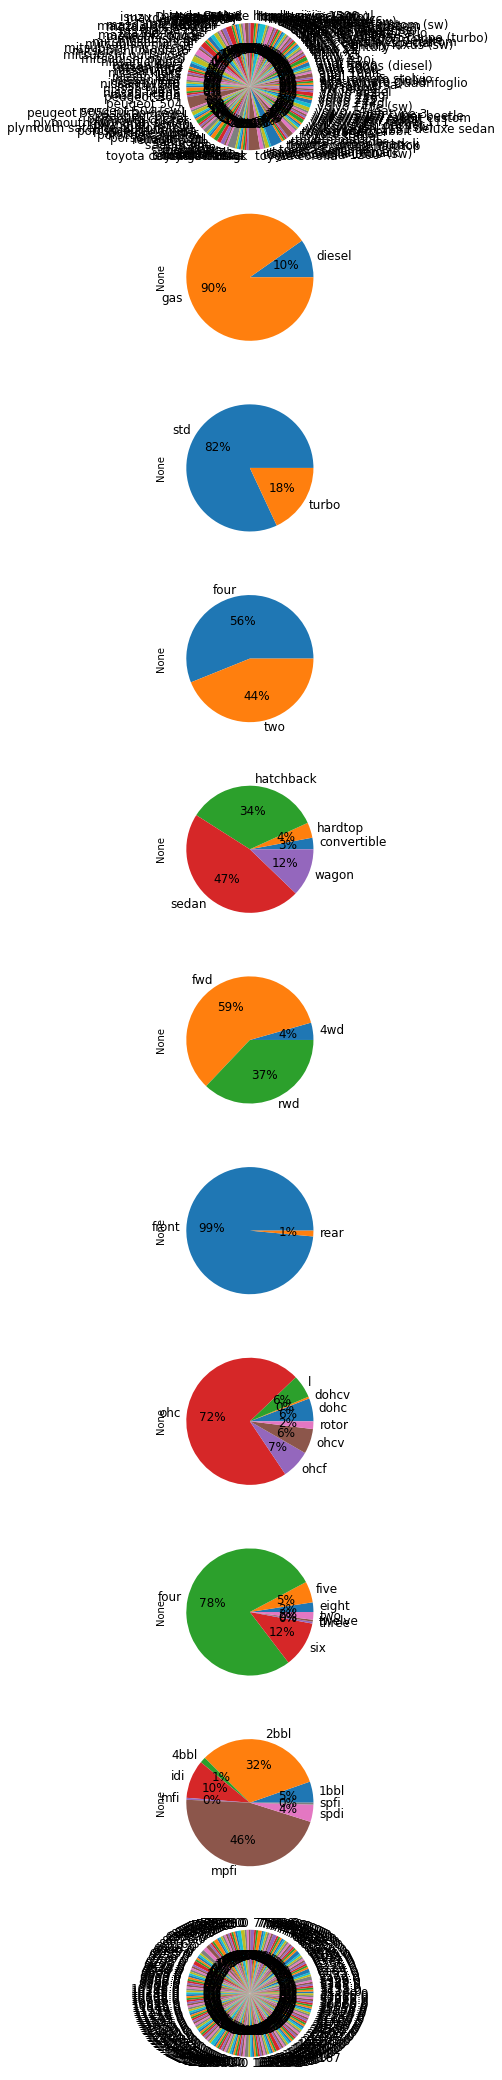

In [25]:
# Distribution of values in categorical features
plt.figure(figsize=(38,38))
def label_function(val):
    #return f'{val / 100 * len(df):.0f}\n{val:.0f}%'
    return f'{val:.0f}%'
j=1
for i in categorical_features:
    plt.subplot(11,1,j)
    df.groupby(i).size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 12})
    j+=1

In [26]:
# categorical_features[0] has too much features so we can remove 'CarName'

In [27]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

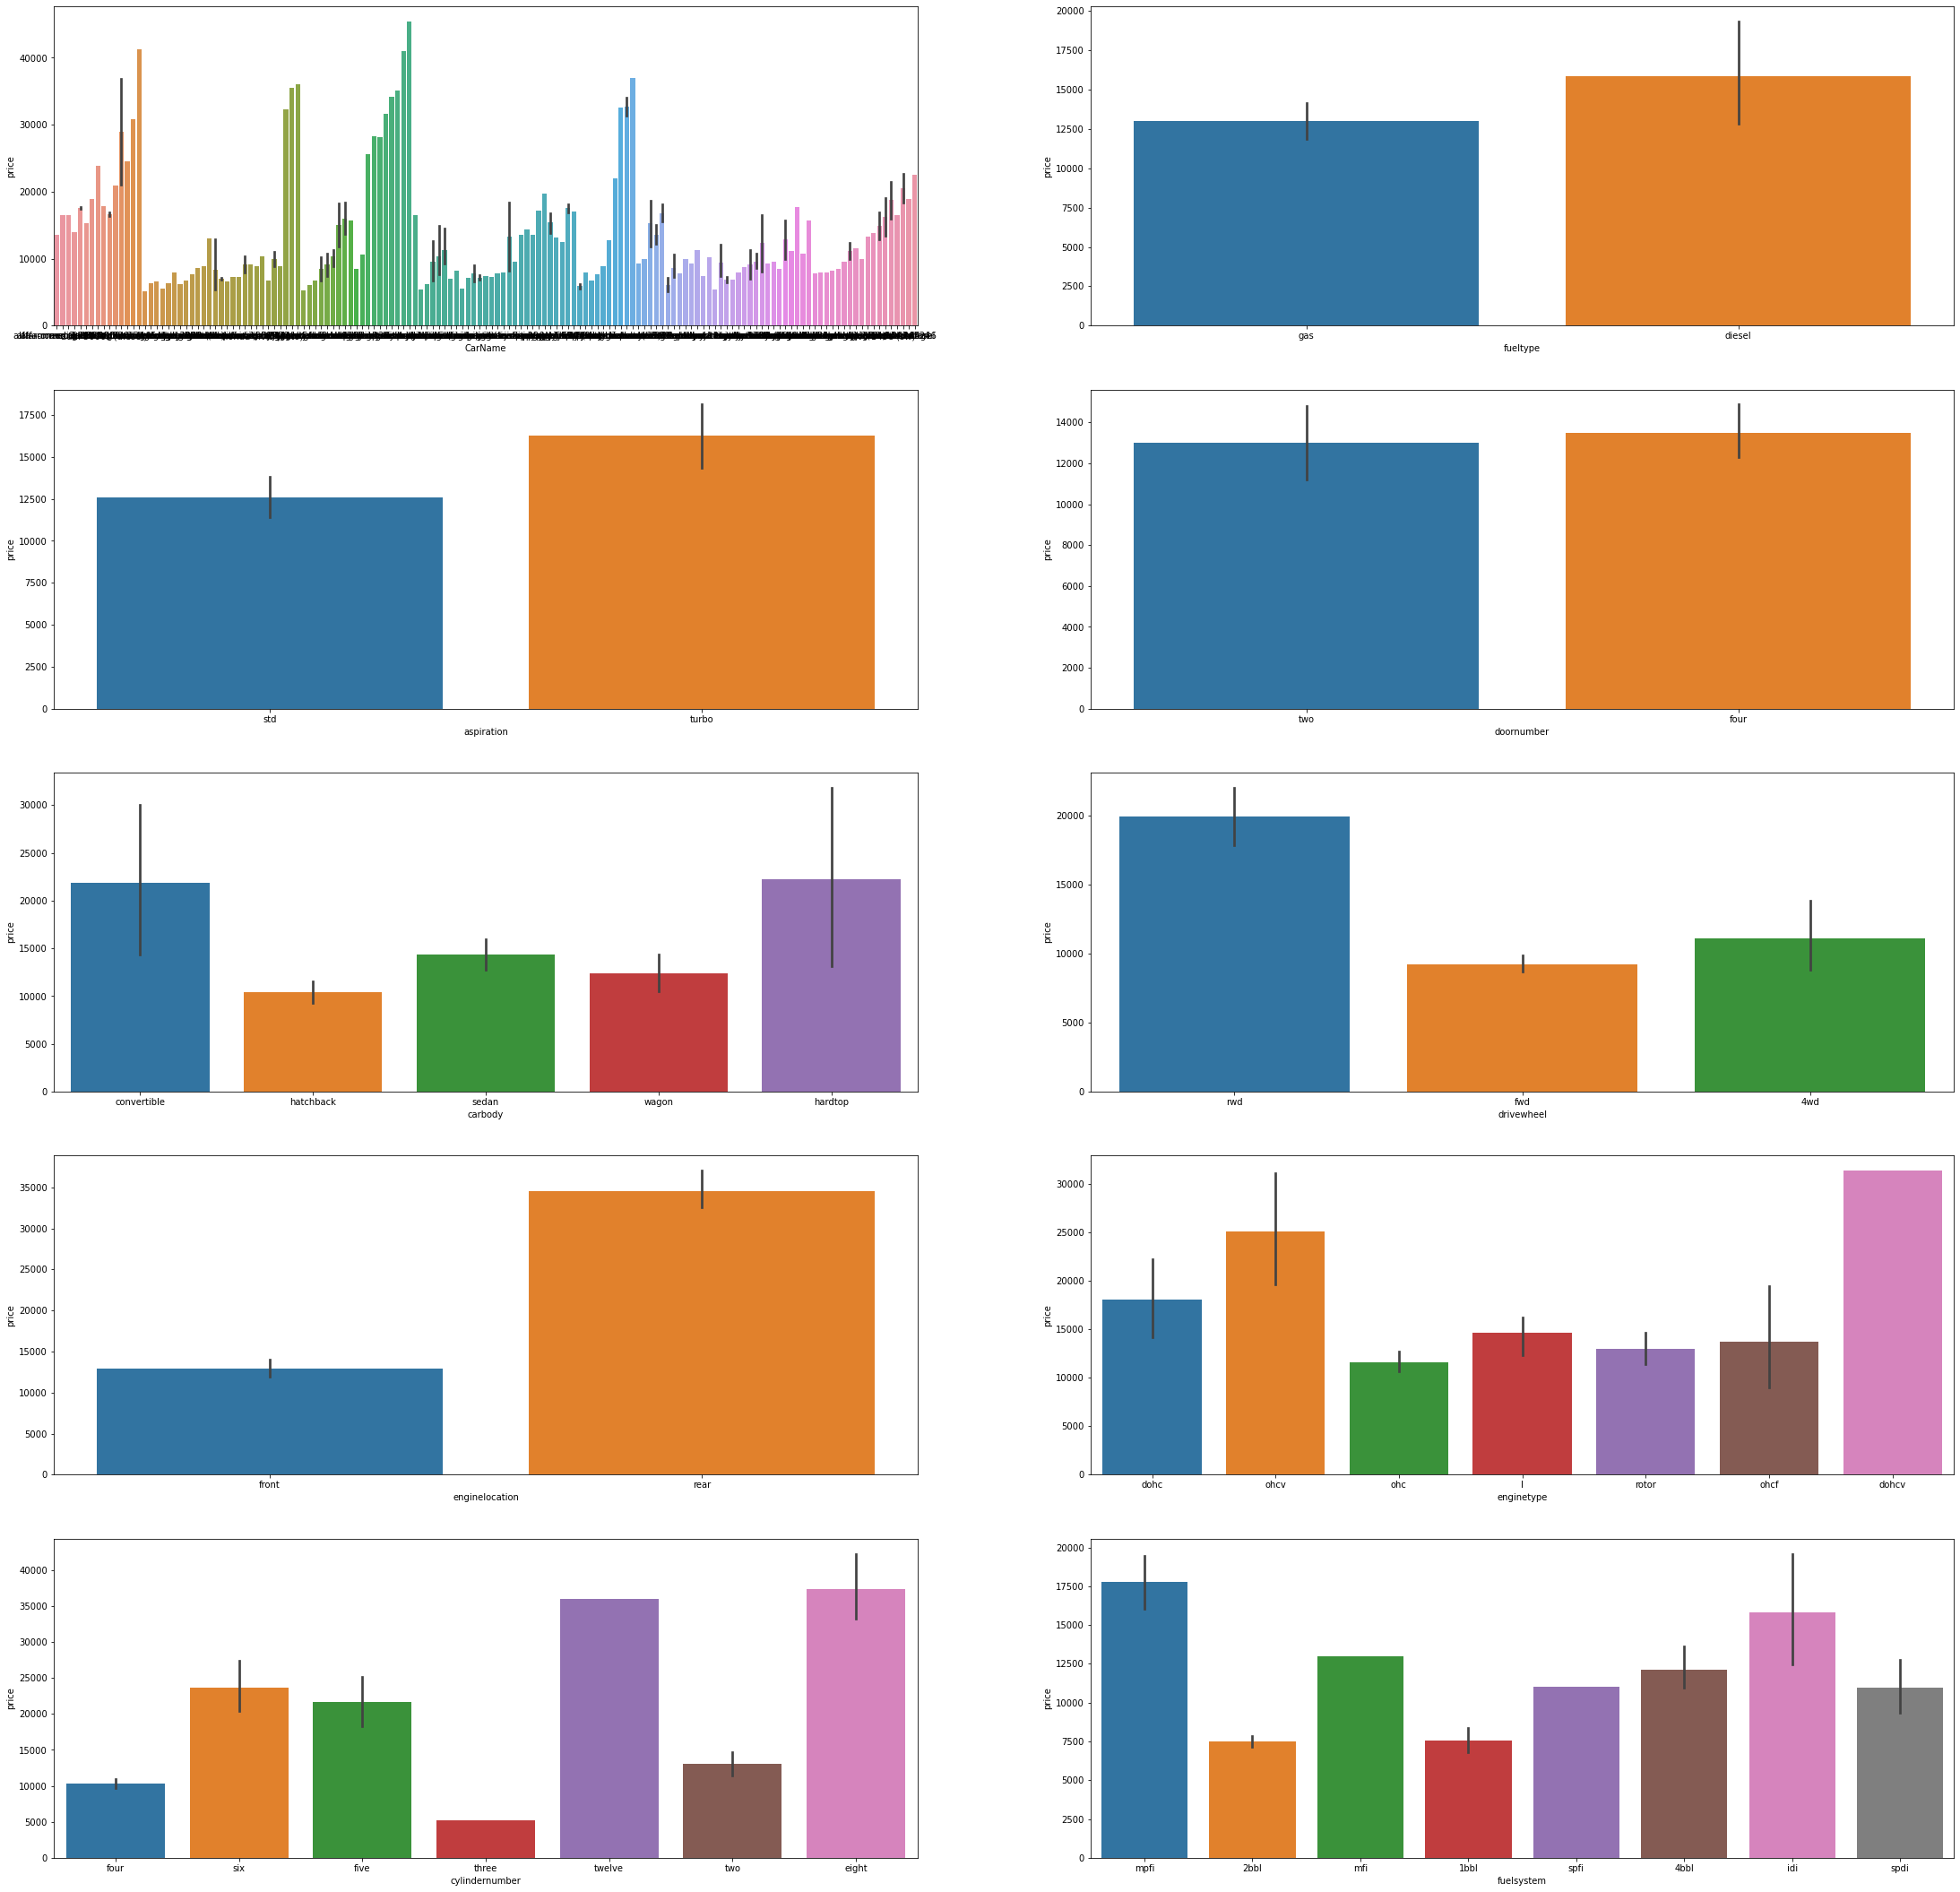

In [38]:
# Bar plots of categorical columns 
plt.figure(figsize=(38,38))
j=1
for i in categorical_features:
    if(i == 'price'):
        break
    plt.subplot(5,2,j)
    sns.barplot(data = df,x=i,y='price')
    j+=1

<AxesSubplot:>

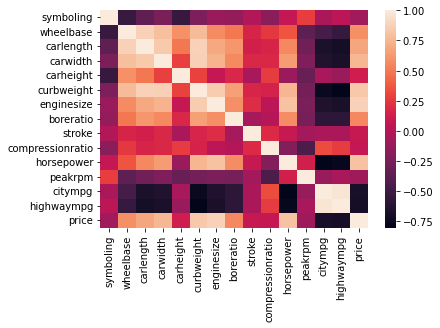

In [41]:
# Heatmap using correlation
sns.heatmap(df.corr())